In [226]:
import pandas as pd
import folium
import ast
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [184]:
# https://towardsdatascience.com/store-locations-d1025df22865

In [258]:
df = pd.read_csv('./data/Legally_Operating_Businesses_20240905.csv')

/var/folders/mg/sts1jc3x4vg3ykt3408_lxs00000gn/T/ipykernel_2448/1060597596.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Legally_Operating_Businesses_20240905.csv')


In [8]:
df.head()

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
0,0967332-DCA,Business,02/28/2017,Inactive,02/04/2010,Home Improvement Contractor,"BARBARINO, JOHN JR.",JOHN BARBARINO JR_HOME IMPROVEMENT,239,MEDFORD CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2103411-DCA,Individual,03/31/2024,Active,01/11/2022,Sightseeing Guide,"Nieciak, Joseph",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2060087-DCA,Individual,03/31/2024,Active,10/31/2017,Sightseeing Guide,"Arcaro, Tyler",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2078026-DCA,Individual,03/31/2024,Active,09/11/2018,Sightseeing Guide,"HESSE, DAPHNEE",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2057801-DCA,Individual,02/28/2019,Inactive,09/01/2017,Home Improvement Salesperson,"ESCOBAR, KEVIN",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df = df.dropna(subset=['Business Name'])

In [262]:
df['is_joe'] = df['Business Name'].str.lower().str.contains('trader joe')
df[df['is_joe']]

/var/folders/mg/sts1jc3x4vg3ykt3408_lxs00000gn/T/ipykernel_2448/2314676368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_joe'] = df['Business Name'].str.lower().str.contains('trader joe')


,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,is_joe


In [259]:
df[df['Industry'] == 'General Vendor']

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
13,1419491-DCA,Individual,09/30/2014,Inactive,02/13/2012,General Vendor,"DOUGLAS, BRUCE",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
31,2107577-DCA,Individual,09/30/2023,Active,07/19/2022,General Vendor,"Encarnacion, Madally",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
49,2107654-DCA,Individual,09/30/2023,Active,07/21/2022,General Vendor,"SIEH, CHRISTINA",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
60,2107525-DCA,Individual,09/30/2023,Active,07/15/2022,General Vendor,"HUANG, XIAO",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: Citywide Specialized Vend...,NaN,NaN,NaN
97,0847106-DCA,Individual,09/30/2006,Inactive,10/07/2005,General Vendor,"ZAMBRANA, FELIPE A",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: Midtown Specialized Vendo...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279560,2114330-DCA,Individual,09/30/2023,Active,06/12/2023,General Vendor,"D'AURORA, AURORA",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
280601,2114580-DCA,Individual,09/30/2025,Active,06/22/2023,General Vendor,"BEN OTHMANE, NABIL",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: General Vendor (White),NaN,NaN,NaN
280620,2114559-DCA,Individual,09/30/2023,Active,06/21/2023,General Vendor,"ABULSI, ABDU",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: Citywide Specialized Vend...,NaN,NaN,NaN
280658,2114564-DCA,Individual,09/30/2023,Active,06/21/2023,General Vendor,"ZOU, XIYOU",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,General Vendor Type: Citywide Specialized Vend...,NaN,NaN,NaN


In [9]:
print(df.shape, df.columns)

(281413, 27) Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Status', 'License Creation Date', 'Industry', 'Business Name',
       'Business Name 2', 'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')


In [14]:
# only focus on business with active license
# assume that all businesses needed the license, 
# and any business that did not request a new license may no longer operating and not considered as competitors
df = df[df['License Status'] == 'Active']
print(df.shape)

(46006, 27)


In [11]:
df['Industry'].value_counts()

Industry
Home Improvement Contractor       12308
Tobacco Retail Dealer              4380
Secondhand Dealer - General        4042
Sightseeing Guide                  2916
Electronics Store                  2231
Locksmith                          2201
Tow Truck Driver                   2149
Electronic Cigarette Dealer        2098
Stoop Line Stand                   1817
General Vendor                     1778
Electronic & Appliance Service     1345
Debt Collection Agency             1327
Garage                             1215
Dealer In Products                  949
Pedicab Driver                      752
Ticket Seller                       567
Secondhand Dealer - Auto            544
Process Server Individual           508
Newsstand                           320
Pedicab Business                    318
Tow Truck Company                   294
Parking Lot                         277
Pawnbroker                          262
Employment Agency                   257
Horse Drawn Driver             

In [22]:
# how many unique business with multiple branch?
len((df['Business Name'].value_counts() > 1).index)

39446

In [23]:
df['Address Borough'].value_counts()

Address Borough
Queens           8892
Brooklyn         8458
Manhattan        6601
Outside NYC      4724
Bronx            4068
Staten Island    2122
MANHATTAN          24
QUEENS              2
Name: count, dtype: int64

In [24]:
df['Borough Code'].value_counts()

Borough Code
4.0    8894
3.0    8458
1.0    6625
2.0    4068
5.0    2122
Name: count, dtype: int64

In [25]:
df['Community Board'].value_counts() #Community District number where the business is located.

Community Board
105.0    1431
407.0     978
412.0     956
401.0     902
405.0     874
         ... 
495.0       1
481.0       1
355.0       1
164.0       1
228.0       1
Name: count, Length: 65, dtype: int64

In [27]:
df['Council District'].value_counts() #City Council District number where the business is located

Council District
4.0     1411
3.0     1348
1.0     1051
28.0     793
30.0     777
26.0     766
38.0     766
49.0     758
48.0     730
50.0     710
21.0     709
39.0     705
47.0     685
22.0     683
34.0     666
43.0     664
27.0     647
51.0     642
13.0     635
32.0     621
17.0     609
29.0     609
20.0     608
2.0      604
19.0     583
33.0     572
37.0     562
15.0     559
24.0     511
5.0      510
45.0     506
25.0     498
8.0      495
44.0     490
23.0     484
46.0     478
12.0     451
40.0     442
6.0      423
11.0     422
14.0     409
10.0     374
18.0     358
9.0      339
16.0     330
41.0     327
7.0      326
35.0     325
42.0     322
36.0     313
31.0     303
Name: count, dtype: int64

In [28]:
df['NTA'].value_counts() #Neighborhood Tabulation Area where the business is located.
# is a geographic unit used by the New York City Department of City Planning to analyze and report demographic data. It is similar to a census tract but is specifically designed for New York City and its unique urban geography.
#NTAs are smaller than census tracts and are defined based on neighborhood boundaries that are often recognized by local residents and communities.

NTA
MN17    195
MN13    127
MN15    125
MN19    119
MN23    109
       ... 
SI48      2
QN98      2
MN99      2
BK99      1
BX99      1
Name: count, Length: 193, dtype: int64

In [29]:
df['Census Tract'].value_counts() #	Census Tract where the business is located.
#  small geographic area, typically defined by the U.S. Census Bureau, used for collecting and reporting demographic data

Census Tract
21.0       43
115.0      40
7.0        38
1502.0     37
65.0       36
           ..
550.0       1
71702.0     1
270.0       1
907.0       1
22703.0     1
Name: count, Length: 1033, dtype: int64

In [31]:
# filter the dataset to only keep 5 boroughts, remove rows with mispelled
NYC_BOROUGHS = ['Queens', 'Brooklyn', 'Manhattan', 'Bronx', 'Staten Island']
df = df[df['Address Borough'].isin(NYC_BOROUGHS)]
print(df.shape)

(30141, 27)


In [32]:
df[['Address Borough', 'Borough Code']].value_counts()

Address Borough  Borough Code
Queens           4.0             8892
Brooklyn         3.0             8458
Manhattan        1.0             6601
Bronx            2.0             4068
Staten Island    5.0             2122
Name: count, dtype: int64

In [35]:
# how many NTA per borough

# remove row with missing NTA
df = df.dropna(subset=['NTA'])
print(df.shape)

(6189, 27)


In [36]:
df.groupby('Address Borough')['NTA'].nunique()

Address Borough
Bronx            38
Brooklyn         52
Manhattan        29
Queens           59
Staten Island    18
Name: NTA, dtype: int64

In [41]:
# convert into the dictionary
borough_nta_dict = df.groupby('Address Borough')['NTA'].apply(list).to_dict()

In [ ]:
# can we get the name of NTA?

In [129]:
df_nta = pd.read_csv("./data/Census_Demographics_at_the_Neighborhood_Tabulation_Area__NTA__level_20240905.csv")

In [130]:
df_nta.head(5)

,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Name,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [131]:
# it would be best to match by the brough name and the code
df_nta[['Geographic Area - Borough', 'Geographic Area - 2010 Census FIPS County Code']].value_counts()

# let drop the column code as it does not match the value used in df
df_nta = df_nta.drop(columns=['Geographic Area - 2010 Census FIPS County Code'])

In [132]:
# let's rename the column
df_nta.columns

Index(['Geographic Area - Borough',
       'Geographic Area - Neighborhood Tabulation Area (NTA)* Code',
       'Geographic Area - Neighborhood Tabulation Area (NTA)* Name',
       'Total Population 2000 Number', 'Total Population 2010 Number',
       'Total Population Change 2000-2010 Number',
       'Total Population Change 2000-2010 Percent'],
      dtype='object')

In [133]:
new_col_nta_names = {
    'Geographic Area - Borough': 'Address Borough',
    'Geographic Area - Neighborhood Tabulation Area (NTA)* Code': 'NTA',
    'Geographic Area - Neighborhood Tabulation Area (NTA)* Name': 'NTA_Name',
    'Total Population 2000 Number': 'Total_Pop_2000',
    'Total Population 2010 Number': 'Total_Pop_2010',
    'Total Population Change 2000-2010 Number': 'Num_Change_Pop_2000_2010',
    'Total Population Change 2000-2010 Percent': 'Pct_Change_Pop_2000_2010'
}
df_nta = df_nta.rename(columns=new_col_nta_names)
print(df_nta.shape)
df_nta.head(5)

(197, 7)


,Address Borough,NTA,NTA_Name,Total_Pop_2000,Total_Pop_2010,Num_Change_Pop_2010_2020,Pct_Change_Pop_2010_2020
0,Bronx,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


In [134]:
# drop any missing data
df_nta = df_nta.dropna(subset=['NTA_Name'])
print(df_nta.shape)

(195, 7)


In [86]:
# let's get the coordinations of the NTA
# programmic access is not allowed - we cannot use google API
# let's simply maps all locaitons of the business in NY

In [94]:
# remove row with missing Longitude, Latitude
df = df.dropna(subset=['Longitude', 'Latitude'])
print(df.shape)

(6177, 27)


In [100]:
# get the list of long lat
coords = df.Location.to_list()
len(coords)

6177

In [110]:
# how many industry we have left
df.Industry.value_counts()

Industry
Tobacco Retail Dealer          3307
Electronic Cigarette Dealer    1615
Garage                          799
Parking Lot                     194
Car Wash                        112
Garage and Parking Lot           69
Laundries                        37
Games of Chance                  23
Bingo Game Operator              13
Tow Truck Company                 3
Pedicab Business                  2
Home Improvement Contractor       1
Sidewalk Cafe                     1
Sightseeing Bus                   1
Name: count, dtype: int64

In [96]:
# visaulise it using the Folium
m = folium.Map(location=(49.25, -123.12), tiles="cartodb positron")
m.save("footprint.html")

In [118]:
# using Marker
mapit = folium.Map(location=(40.6973709, -74.1444874), zoom_start=10) #initial location in new york
for coord in coords[0:100]:
    coord = ast.literal_eval(coord)
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )
    # mapit = folium.Map( location=[ coord[0], coord[1] ] )
mapit.save("footprint.html")

In [119]:
# check what if we don't filter by license status
df2 = pd.read_csv('./data/Legally_Operating_Businesses_20240905.csv')
df2 = df2.dropna(subset=['Longitude', 'Latitude', 'NTA'])
df2 = df2[df2['Address Borough'].isin(NYC_BOROUGHS)]
print(df2.shape)
df2.Industry.value_counts()

/var/folders/mg/sts1jc3x4vg3ykt3408_lxs00000gn/T/ipykernel_2448/1153258318.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./data/Legally_Operating_Businesses_20240905.csv')


(136937, 27)


Industry
Tobacco Retail Dealer             37487
Home Improvement Contractor       21177
Secondhand Dealer - General       12570
Electronics Store                 11801
Stoop Line Stand                   7353
Laundry                            6801
Electronic & Appliance Service     5261
Laundries                          4347
Laundry Jobber                     4310
Sidewalk Cafe                      3719
Garage                             3101
Electronic Cigarette Dealer        2918
Secondhand Dealer - Auto           2317
Parking Lot                        1715
Dealer In Products                 1585
Tow Truck Company                  1223
Employment Agency                  1096
Special Sale                        996
Amusement Device Temporary          974
Amusement Device Portable           932
Pawnbroker                          764
Cabaret                             602
Debt Collection Agency              486
Pedicab Business                    418
Amusement Device Permanent     

In [135]:
df_nta

,Address Borough,NTA,NTA_Name,Total_Pop_2000,Total_Pop_2010,Num_Change_Pop_2010_2020,Pct_Change_Pop_2010_2020
0,Bronx,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6
...,...,...,...,...,...,...,...
190,Staten Island,SI37,Stapleton-Rosebank,24048.0,26453.0,2405.0,10.0
191,Staten Island,SI45,New Dorp-Midland Beach,20242.0,21896.0,1654.0,8.2
192,Staten Island,SI48,Arden Heights,24996.0,25238.0,242.0,1.0
193,Staten Island,SI54,Great Kills,41680.0,40720.0,-960.0,-2.3


In [161]:
# merge the df together
merged_df = pd.merge(df, df_nta, on='NTA', how='left')
merged_df.shape

(6177, 33)

In [162]:
print(merged_df.NTA_Name.isnull().sum()) #no missing data
print(merged_df.Total_Pop_2010.isnull().sum())

0
0


In [163]:
df_nta2 = df_nta[['Address Borough', 'NTA', 'NTA_Name']]

In [164]:
# let check the type of store in each NTA
industry_lst = list(merged_df.Industry.unique())

In [146]:
industry_lst

['Garage',
 'Tobacco Retail Dealer',
 'Laundries',
 'Electronic Cigarette Dealer',
 'Car Wash',
 'Parking Lot',
 'Bingo Game Operator',
 'Garage and Parking Lot',
 'Games of Chance',
 'Home Improvement Contractor',
 'Sidewalk Cafe',
 'Tow Truck Company',
 'Sightseeing Bus',
 'Pedicab Business']

In [165]:
merged_df = merged_df.drop(columns=['Address Borough_y'])
merged_df = merged_df.rename(columns={'Address Borough_x': 'Address Borough'})

In [170]:
merged_df.groupby(['Address Borough', 'NTA', 'Industry'])['Business Name'].count().reset_index()

,Address Borough,NTA,Industry,Business Name
0,Bronx,BX01,Electronic Cigarette Dealer,3
1,Bronx,BX01,Garage,1
2,Bronx,BX01,Parking Lot,2
3,Bronx,BX01,Tobacco Retail Dealer,13
4,Bronx,BX03,Electronic Cigarette Dealer,3
...,...,...,...,...
719,Staten Island,SI48,Electronic Cigarette Dealer,1
720,Staten Island,SI48,Tobacco Retail Dealer,1
721,Staten Island,SI54,Car Wash,2
722,Staten Island,SI54,Electronic Cigarette Dealer,19


In [173]:
pivot_df = merged_df.pivot_table(index=['Address Borough', 'NTA'], columns=['Industry'], values='Business Name', aggfunc="count", fill_value = 0)

In [179]:
pivot_df = pivot_df.reset_index()
pivot_df.head(5)

Industry,Address Borough,NTA,Bingo Game Operator,Car Wash,Electronic Cigarette Dealer,Games of Chance,Garage,Garage and Parking Lot,Home Improvement Contractor,Laundries,Parking Lot,Pedicab Business,Sidewalk Cafe,Sightseeing Bus,Tobacco Retail Dealer,Tow Truck Company
0,Bronx,BX01,0,0,3,0,1,0,0,0,2,0,0,0,13,0
1,Bronx,BX03,0,0,3,0,0,0,0,0,0,0,0,0,7,1
2,Bronx,BX05,0,0,8,0,3,0,0,0,2,0,0,0,25,0
3,Bronx,BX06,0,0,7,0,1,0,0,0,4,0,0,0,23,0
4,Bronx,BX07,0,0,4,0,1,0,0,0,1,0,0,0,14,0


In [180]:
# pivot_df.to_csv('./data/nyc_nta_business_count.csv')

In [181]:
nyc_nta_grouped_clustering = pivot_df.drop(columns=['Address Borough', 'NTA'])

1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

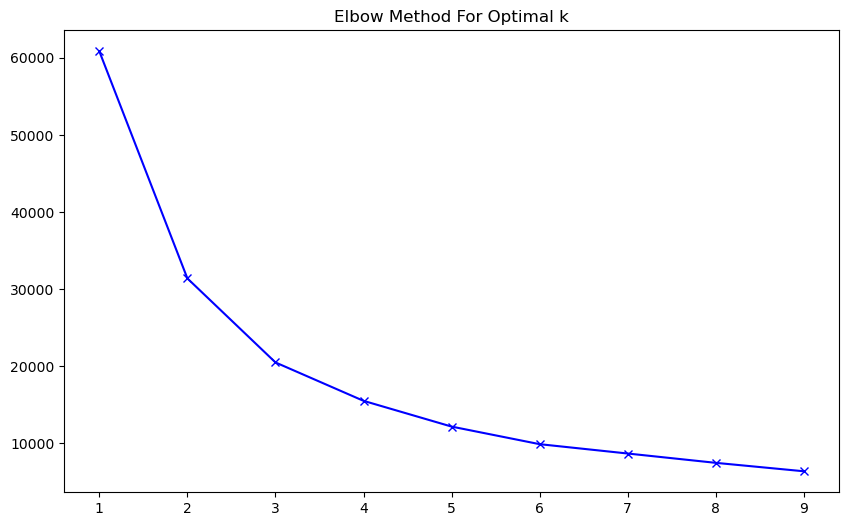

In [185]:
# let's do neighbourhood segmentation
sum_of_squared_distances = []

# maximum of 10 clusters
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(nyc_nta_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

In [186]:
# k = 3 is optimal number
# let's breakdown the NTA into 3 groups

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=100).fit(nyc_nta_grouped_clustering)

# # add clustering labels
# neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# madrid_merged = df_madrid

# # merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
# madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

# madrid_merged.head()

In [188]:
len(kmeans.labels_)

196

In [189]:
nyc_nta_grouped_clustering

Industry,Bingo Game Operator,Car Wash,Electronic Cigarette Dealer,Games of Chance,Garage,Garage and Parking Lot,Home Improvement Contractor,Laundries,Parking Lot,Pedicab Business,Sidewalk Cafe,Sightseeing Bus,Tobacco Retail Dealer,Tow Truck Company
0,0,0,3,0,1,0,0,0,2,0,0,0,13,0
1,0,0,3,0,0,0,0,0,0,0,0,0,7,1
2,0,0,8,0,3,0,0,0,2,0,0,0,25,0
3,0,0,7,0,1,0,0,0,4,0,0,0,23,0
4,0,0,4,0,1,0,0,0,1,0,0,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,11,0,0,0,0,0,0,0,0,0,12,0
192,1,3,10,2,0,0,0,0,0,0,0,0,22,0
193,0,3,10,0,0,0,0,0,0,0,0,0,11,0
194,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [206]:
nyc_label = pivot_df.copy()
nyc_label['label'] = kmeans.labels_
nyc_label

Industry,Address Borough,NTA,Bingo Game Operator,Car Wash,Electronic Cigarette Dealer,Games of Chance,Garage,Garage and Parking Lot,Home Improvement Contractor,Laundries,Parking Lot,Pedicab Business,Sidewalk Cafe,Sightseeing Bus,Tobacco Retail Dealer,Tow Truck Company,label
0,Bronx,BX01,0,0,3,0,1,0,0,0,2,0,0,0,13,0,1
1,Bronx,BX03,0,0,3,0,0,0,0,0,0,0,0,0,7,1,1
2,Bronx,BX05,0,0,8,0,3,0,0,0,2,0,0,0,25,0,2
3,Bronx,BX06,0,0,7,0,1,0,0,0,4,0,0,0,23,0,2
4,Bronx,BX07,0,0,4,0,1,0,0,0,1,0,0,0,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Staten Island,SI36,0,0,11,0,0,0,0,0,0,0,0,0,12,0,1
192,Staten Island,SI37,1,3,10,2,0,0,0,0,0,0,0,0,22,0,2
193,Staten Island,SI45,0,3,10,0,0,0,0,0,0,0,0,0,11,0,1
194,Staten Island,SI48,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [211]:
# check each cluster 
nyc_label[nyc_label.label == 0]

Industry,Address Borough,NTA,Bingo Game Operator,Car Wash,Electronic Cigarette Dealer,Games of Chance,Garage,Garage and Parking Lot,Home Improvement Contractor,Laundries,Parking Lot,Pedicab Business,Sidewalk Cafe,Sightseeing Bus,Tobacco Retail Dealer,Tow Truck Company,label
96,Manhattan,MN12,0,0,21,0,29,3,0,1,1,0,0,0,29,0,0
97,Manhattan,MN13,0,1,32,1,41,3,0,1,9,0,0,0,39,0,0
99,Manhattan,MN15,0,1,39,0,27,0,0,0,5,1,0,0,52,0,0
100,Manhattan,MN17,0,0,52,0,42,4,0,1,5,1,0,1,89,0,0
101,Manhattan,MN19,0,0,24,0,54,3,0,0,2,0,0,0,36,0,0
102,Manhattan,MN20,0,0,26,0,39,2,0,0,3,0,0,0,31,0,0
105,Manhattan,MN23,0,0,31,2,25,5,0,0,5,0,1,0,40,0,0
106,Manhattan,MN24,0,0,27,0,20,2,0,0,10,0,0,0,45,0,0
107,Manhattan,MN25,0,0,29,1,28,1,0,1,4,0,0,0,43,0,0
110,Manhattan,MN31,0,0,15,0,55,3,0,0,0,0,0,0,28,0,0


In [219]:
# NTA analysis level
nta_0_lst = nyc_label[nyc_label.label == 0].NTA.to_list()
df_nta_0 = df_nta[df_nta.NTA.isin(nta_0_lst)]
df_nta_0

,Address Borough,NTA,NTA_Name,Total_Pop_2000,Total_Pop_2010,Num_Change_Pop_2010_2020,Pct_Change_Pop_2010_2020
95,Manhattan,MN12,Upper West Side,136954.0,132378.0,-4576.0,-3.3
96,Manhattan,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,55839.0,70150.0,14311.0,25.6
98,Manhattan,MN15,Clinton,40595.0,45884.0,5289.0,13.0
99,Manhattan,MN17,Midtown-Midtown South,25807.0,28630.0,2823.0,10.9
100,Manhattan,MN19,Turtle Bay-East Midtown,49737.0,51231.0,1494.0,3.0
101,Manhattan,MN20,Murray Hill-Kips Bay,48419.0,50742.0,2323.0,4.8
104,Manhattan,MN23,West Village,68483.0,66880.0,-1603.0,-2.3
105,Manhattan,MN24,SoHo-TriBeCa-Civic Center-Little Italy,36757.0,42742.0,5985.0,16.3
106,Manhattan,MN25,Battery Park City-Lower Manhattan,20088.0,39699.0,19611.0,97.6
109,Manhattan,MN31,Lenox Hill-Roosevelt Island,76631.0,80771.0,4140.0,5.4


In [220]:
# let focus on one specific industry
nyc_label[nyc_label.label == 0][['NTA', 'Garage']]

Industry,NTA,Garage
96,MN12,29
97,MN13,41
99,MN15,27
100,MN17,42
101,MN19,54
102,MN20,39
105,MN23,25
106,MN24,20
107,MN25,28
110,MN31,55


In [218]:
df_nta_0_garage = pd.merge(nyc_label[nyc_label.label == 0][['NTA', 'Garage']], df_nta_0, on='NTA')
df_nta_0_garage

,NTA,Garage,Address Borough,NTA_Name,Total_Pop_2000,Total_Pop_2010,Num_Change_Pop_2010_2020,Pct_Change_Pop_2010_2020
0,MN12,29,Manhattan,Upper West Side,136954.0,132378.0,-4576.0,-3.3
1,MN13,41,Manhattan,Hudson Yards-Chelsea-Flat Iron-Union Square,55839.0,70150.0,14311.0,25.6
2,MN15,27,Manhattan,Clinton,40595.0,45884.0,5289.0,13.0
3,MN17,42,Manhattan,Midtown-Midtown South,25807.0,28630.0,2823.0,10.9
4,MN19,54,Manhattan,Turtle Bay-East Midtown,49737.0,51231.0,1494.0,3.0
5,MN20,39,Manhattan,Murray Hill-Kips Bay,48419.0,50742.0,2323.0,4.8
6,MN23,25,Manhattan,West Village,68483.0,66880.0,-1603.0,-2.3
7,MN24,20,Manhattan,SoHo-TriBeCa-Civic Center-Little Italy,36757.0,42742.0,5985.0,16.3
8,MN25,28,Manhattan,Battery Park City-Lower Manhattan,20088.0,39699.0,19611.0,97.6
9,MN31,55,Manhattan,Lenox Hill-Roosevelt Island,76631.0,80771.0,4140.0,5.4


In [222]:
df_nta_0_garage['people_per_shop'] = df_nta_0_garage.apply(lambda x: (x['Total_Pop_2010'] // x['Garage']) if x['Garage'] > 0 else x['Total_Pop_2010'], axis=1)
df_nta_0_garage

,NTA,Garage,Address Borough,NTA_Name,Total_Pop_2000,Total_Pop_2010,Num_Change_Pop_2010_2020,Pct_Change_Pop_2010_2020,people_per_shop
0,MN12,29,Manhattan,Upper West Side,136954.0,132378.0,-4576.0,-3.3,4564.0
1,MN13,41,Manhattan,Hudson Yards-Chelsea-Flat Iron-Union Square,55839.0,70150.0,14311.0,25.6,1710.0
2,MN15,27,Manhattan,Clinton,40595.0,45884.0,5289.0,13.0,1699.0
3,MN17,42,Manhattan,Midtown-Midtown South,25807.0,28630.0,2823.0,10.9,681.0
4,MN19,54,Manhattan,Turtle Bay-East Midtown,49737.0,51231.0,1494.0,3.0,948.0
5,MN20,39,Manhattan,Murray Hill-Kips Bay,48419.0,50742.0,2323.0,4.8,1301.0
6,MN23,25,Manhattan,West Village,68483.0,66880.0,-1603.0,-2.3,2675.0
7,MN24,20,Manhattan,SoHo-TriBeCa-Civic Center-Little Italy,36757.0,42742.0,5985.0,16.3,2137.0
8,MN25,28,Manhattan,Battery Park City-Lower Manhattan,20088.0,39699.0,19611.0,97.6,1417.0
9,MN31,55,Manhattan,Lenox Hill-Roosevelt Island,76631.0,80771.0,4140.0,5.4,1468.0


<Axes: xlabel='people_per_shop', ylabel='Total_Pop_2010'>

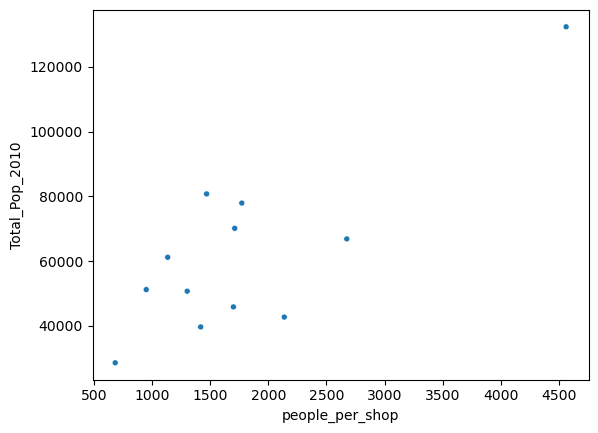

In [235]:
sns.scatterplot(x='people_per_shop', y='Total_Pop_2010', data=df_nta_0_garage, size=8, legend=False)

<Axes: xlabel='people_per_shop', ylabel='Total_Pop_2010'>

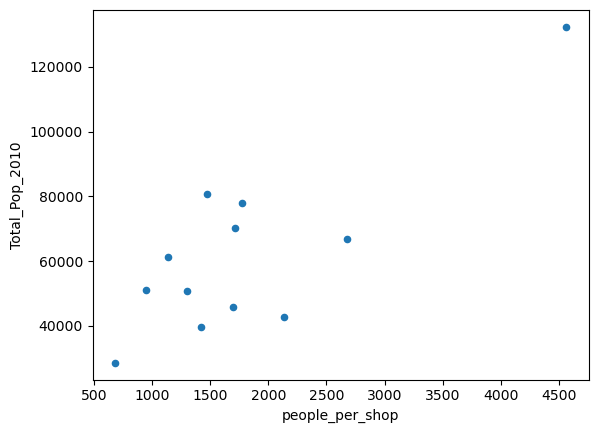

In [233]:
df_nta_0_garage.plot.scatter(x='people_per_shop', y='Total_Pop_2010')

<Axes: title={'center': 'NYC residential neighbourhoods'}, xlabel='People per shop', ylabel='Population'>

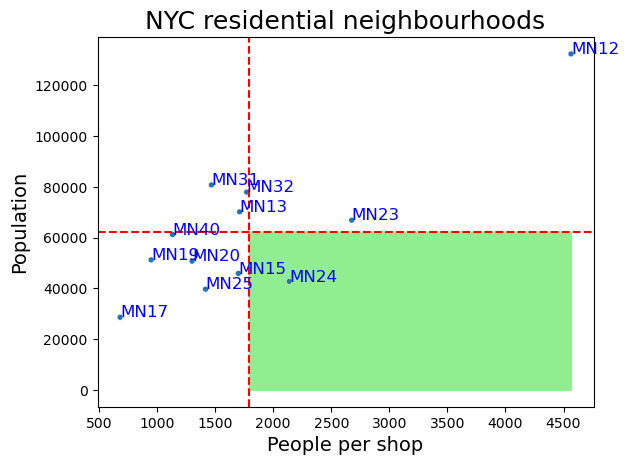

In [237]:
# visualisation
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    # Create the scatter plot
    p1 = sns.scatterplot(x=x, y=y, data=data, size=8, legend=False)
    # Add text besides each point

    
    texts = [p1.text(data[x][line], data[y][line], 
             data[text_column][line], horizontalalignment='left', 
             size='large', color='blue') for line in range(0,data.shape[0])]
    # Set title and axis labels
    plt.title(title, size=18)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    return p1
    
# Add horizontal and vertical lines to mark the median values
avg_people_per_market = df_nta_0_garage['people_per_shop'].mean()
max_people_per_market = df_nta_0_garage['people_per_shop'].max()
avg_population = df_nta_0_garage['Total_Pop_2010'].mean()

plt.axhline(y=avg_population, color='r', linestyle='--')
plt.axvline(x=avg_people_per_market, color='r', linestyle='--')

# Highlight the optimal quadrant
plt.fill_between(x=np.arange(avg_people_per_market, max_people_per_market), y1=0, y2=avg_population, color='lightgreen')

# Draw and label the neighbourhood points
scatter_text('people_per_shop', 'Total_Pop_2010', 'NTA',
             data = df_nta_0_garage, 
             title = 'NYC residential neighbourhoods', 
             xlabel = 'People per shop',
             ylabel = 'Population')

In [198]:
# get the top 5 of industry per NTA
top_industry_per_nta = merged_df.groupby(['Address Borough', 'NTA', 'Industry'])['Business Name'].count().reset_index()

In [196]:
top_industry_per_nta = merged_df.groupby(['Address Borough', 'NTA', 'Industry'])['Business Name'].count().nlargest(5)

In [201]:
top_industry_per_nta

,Address Borough,NTA,Industry,Business Name
0,Bronx,BX01,Electronic Cigarette Dealer,3
1,Bronx,BX01,Garage,1
2,Bronx,BX01,Parking Lot,2
3,Bronx,BX01,Tobacco Retail Dealer,13
4,Bronx,BX03,Electronic Cigarette Dealer,3
...,...,...,...,...
719,Staten Island,SI48,Electronic Cigarette Dealer,1
720,Staten Island,SI48,Tobacco Retail Dealer,1
721,Staten Island,SI54,Car Wash,2
722,Staten Island,SI54,Electronic Cigarette Dealer,19
